# Entrenamiento y análisis de resultados

## Comparación de DQN, Double DQN y Dueling Double DQN en CarRacing-v3



**Curso:** Aprendizaje por Refuerzo (MIA-204)

**Grupo:** 4



**Integrantes:**

- Koc Góngora, Luis Enrique

- Mancilla Antaya, Alex Felipe

- Meléndez García, Herbert Antonio

- Paitán Cano, Dennis Jack



---



### Objetivo del experimento



Analizar y **comparar el desempeño** de agentes basados en **Deep Q-Network (DQN)** en el entorno **CarRacing-v3** (Gymnasium), evaluando el impacto de distintas variantes del algoritmo y de la duración del entrenamiento.



En particular, el experimento contrasta el comportamiento de **DQN clásico**, **Double DQN** y **Dueling Double DQN**, considerando modelos entrenados durante **200 y 1000 episodios**. La comparación se realiza mediante métricas cuantitativas y visualizaciones, con el fin de identificar diferencias en rendimiento, estabilidad y consistencia entre los enfoques evaluados.


## Entorno: CarRacing-v3

CarRacing-v3 es un entorno continuo donde el agente controla un vehículo mediante:
- **dirección**
- **aceleración**
- **freno**

Referencia del entorno y su definición (observación, recompensa y espacio de acciones): **Gymnasium / CarRacing-v3** (Farama Foundation, n.d.).

Dado que los enfoques basados en **Deep Q-Network (DQN)** y sus variantes (**Double DQN** y **Double Dueling DQN**) operan sobre **espacios de acciones discretos**, el control continuo del entorno fue discretizado definiendo **12 acciones fijas** que combinan dirección, aceleración y frenado. Esta discretización constituye una adaptación práctica necesaria para aplicar este tipo de algoritmos (Mnih et al., 2015).

La observación del entorno se recibe como una imagen RGB de 96×96 píxeles. Para el entrenamiento y la evaluación de los agentes, dicha imagen se **preprocesa** de la siguiente manera:
- conversión a **escala de grises**
- **normalización** de valores entre 0 y 1
- **apilamiento de 4 frames consecutivos** (stack temporal), con el fin de incorporar información de movimiento.

Este esquema de preprocesamiento y *frame stacking* sigue el *pipeline clásico* utilizado en DQN con entradas visuales, inspirado en trabajos previos sobre Atari, permitiendo reducir la dimensionalidad de la entrada y capturar la dinámica temporal del entorno (Mnih et al., 2013; Mnih et al., 2015).

Cabe resaltar que este mismo entorno, discretización y preprocesamiento se utilizan de forma idéntica para todas las arquitecturas evaluadas, garantizando una comparación justa entre los modelos.


## Configuración del entrenamiento

A continuación se describen los parámetros utilizados durante el entrenamiento de los agentes.
Salvo indicación contraria, **la configuración base es común a todas las arquitecturas evaluadas**: **DQN**, **Double DQN** y **Double Dueling DQN**, con el fin de garantizar una comparación justa.

### Hiperparámetros principales
- Algoritmo base: **Deep Q-Network (DQN)** y sus variantes
- Factor de descuento (γ): **0.99**
- Optimizador: **Adam**
- Learning rate (lr): **1e-4**
- Función de pérdida: **MSE** (error cuadrático medio)

En el caso de **Double DQN**, se modifica el cálculo del valor objetivo para reducir la sobreestimación de los valores Q.
En **Double Dueling DQN**, se emplea además una arquitectura que separa la estimación del valor del estado y la ventaja de las acciones.

### Estrategia de exploración (ε-greedy)
- ε inicial: **1.0**
- ε mínimo: **0.05**
- Decaimiento de ε: **0.995**

Durante el entrenamiento, el valor de ε se reduce progresivamente a medida que el agente actualiza sus parámetros, favoreciendo la transición de exploración a explotación.

### Replay Buffer y entrenamiento
- Tamaño del replay buffer: **50,000** transiciones
- Tamaño de mini-batch: **64**
- Muestreo: aleatorio desde el buffer de experiencias

### Representación del estado
- Tamaño de la imagen base: **96×96**
- Preprocesamiento: conversión a **escala de grises** y **normalización** (valores entre 0 y 1)
- Stack temporal: **4 frames consecutivos**
  (estado final de dimensión **4×96×96**)

### Espacio de acciones
- Número de acciones discretas: **12**
- Cada acción corresponde a una combinación fija de **dirección**, **aceleración** y **frenado**

### Detalles del ciclo de entrenamiento
- Episodios de entrenamiento: **1 a 1000**
- Frame skipping: `SKIP_FRAMES = 2`
  (cada acción seleccionada se mantiene durante 3 frames consecutivos)
- Actualización de la red objetivo: cada **5** episodios
- Guardado de modelos: cada **25** episodios



## Sección 1: Entrenamiento de los agentes DQN

### Análisis general del proceso de entrenamiento

Durante esta etapa se entrenaron tres variantes del algoritmo **Deep Q-Network** en el entorno **CarRacing-v3**, con el objetivo de analizar cómo distintas mejoras sobre DQN afectan el proceso de aprendizaje y el desempeño final del agente.

Los modelos entrenados fueron:

- **DQN clásico**
- **Double DQN**
- **Dueling Double DQN**

En todos los casos, el agente aprende mediante interacción directa con el entorno, utilizando la recompensa como señal de aprendizaje y almacenando experiencias en un *replay buffer*. Para cada entrenamiento se registraron métricas por episodio (reward, loss, epsilon, tamaño del buffer), las cuales permiten analizar la dinámica del aprendizaje.

---

### Entrenamiento del agente DQN clásico

El entrenamiento del **DQN clásico** sirve como línea base del experimento. A lo largo de los episodios, el agente pasa de un comportamiento altamente exploratorio a uno más estable, logrando mejorar progresivamente su desempeño en pista.

Los gráficos de *loss*, *reward*, *epsilon* y crecimiento del *replay buffer* muestran un comportamiento típico en aprendizaje por refuerzo con redes profundas:
- alta variabilidad inicial,
- estabilización progresiva de la política,
- y aumento sostenido del reward conforme el agente aprende a mantenerse en pista.

Este entrenamiento base permite verificar que la discretización de acciones, el preprocesamiento visual y los hiperparámetros elegidos son adecuados para el entorno.

---

### Entrenamiento del agente Double DQN

El modelo **Double DQN** se entrenó bajo las mismas condiciones experimentales que el DQN clásico, modificando únicamente la forma en que se calcula el valor objetivo durante la actualización de la red.

La motivación principal de Double DQN es reducir la **sobreestimación de los valores Q**, un problema conocido del DQN clásico. Durante el entrenamiento, el comportamiento general del agente es similar al de DQN, aunque con una señal de aprendizaje más estable en ciertos tramos.

El análisis detallado del desempeño de Double DQN se realiza posteriormente mediante episodios de evaluación sin exploración, lo que permite comparar su política final con la del DQN clásico.

---

### Entrenamiento del agente Dueling Double DQN

Finalmente, se entrenó un modelo **Dueling Double DQN**, que combina la corrección de sobreestimación de Double DQN con una arquitectura *dueling*, en la cual la red separa explícitamente la estimación del **valor del estado** y la **ventaja de cada acción**.

Esta arquitectura busca aprender representaciones más eficientes del estado, especialmente en situaciones donde muchas acciones tienen efectos similares. El proceso de entrenamiento sigue la misma lógica general que los modelos anteriores, compartiendo hiperparámetros, preprocesamiento y discretización de acciones.

---

### Cierre de la etapa de entrenamiento

En conjunto, los entrenamientos realizados permiten contar con tres agentes entrenados bajo un **marco experimental consistente**, diferenciándose únicamente por la arquitectura y el método de actualización de los valores Q.

Si bien las métricas internas del entrenamiento (loss, epsilon, buffer) ayudan a comprender el proceso de aprendizaje, el criterio principal para comparar los modelos es su **desempeño en evaluación**, ejecutando episodios sin exploración y bajo las mismas condiciones.

En la siguiente sección se presenta la **evaluación comparativa** entre **DQN**, **Double DQN** y **Dueling Double DQN**, analizando el impacto de estas variantes tanto para modelos entrenados a **200 episodios** como a **1000 episodios**.









## Sección 2: Comparación cuantitativa entre modelos



El objetivo principal de esta sección es comparar el desempeño de las distintas variantes de DQN implementadas en el proyecto, evaluando tanto el efecto de la arquitectura como el número de episodios de entrenamiento.



Se comparan los siguientes modelos:

- **DQN**

- **Double DQN**

- **Dueling Double DQN**



Cada uno evaluado en dos puntos del entrenamiento:

- **200 episodios**

- **1000 episodios**



---



### Metodología de comparación



La comparación se basa exclusivamente en los resultados obtenidos durante la **fase de evaluación**, donde:



- ε = 0 (sin exploración)

- Se ejecutaron **5 episodios** por modelo

- Se utilizaron las mismas condiciones de entorno, discretización de acciones y preprocesamiento



Los datos provienen directamente de los archivos `metricas.csv` generados por cada evaluación, sin ningún ajuste manual.



---



### Métricas consideradas



A partir de cada archivo `metricas.csv` se calcularon las siguientes métricas:



- **Reward promedio**: desempeño medio del agente.

- **Reward máximo**: mejor episodio observado.

- **Reward mínimo**: peor episodio durante la evaluación.

- **Desviación estándar del reward**: medida de estabilidad entre episodios.

- **Frames promedio**: capacidad del agente para mantenerse en pista (episodios más largos indican mayor robustez).



Nota: en el código de este notebook la desviación estándar se calcula como **desviación poblacional** (`ddof=0`) para mantener consistencia en reportes con pocos episodios.



---



### Tabla comparativa de resultados



| Modelo                | Episodios entrenados | Reward promedio | Reward máx | Reward mín | Std reward (ddof=0) | Frames promedio |

|-----------------------|----------------------|----------------|------------|------------|---------------------|----------------|

| DQN                   | 200                  | 238.85         | 646.67     | 67.24      | 207.06              | 961.8          |

| DQN                   | 1000                 | 418.58         | 825.09     | 252.73     | 209.95              | 1000.0         |

| Double DQN            | 200                  | 108.76         | 265.52     | 30.74      | 81.52               | 1000.0         |

| Double DQN            | 1000                 | 567.72         | 883.33     | 278.29     | 257.19              | 1000.0         |

| Dueling Double DQN    | 200                  | 262.85         | 463.14     | 46.63      | 174.93              | 854.2          |

| Dueling Double DQN    | 1000                 | 462.46         | 793.47     | 189.76     | 222.57              | 880.4          |



Los valores fueron calculados directamente a partir de los resultados de evaluación registrados en los CSV correspondientes.



---



### Análisis comparativo



A partir de los resultados se observan las siguientes tendencias generales:



- Incrementar el número de episodios de entrenamiento (**200 → 1000**) mejora de forma consistente el **reward promedio** en todas las variantes, lo que indica que los agentes continúan refinando su política con mayor experiencia.

- A **1000 episodios**, **Double DQN** obtiene el **mayor reward promedio** en esta corrida.

- **Dueling Double DQN** alcanza rewards competitivos y, frente a Double DQN, muestra una **variabilidad menor** en estas evaluaciones (aunque no supera su reward promedio).



El análisis de los **frames promedio** aporta información adicional relevante:

- Valores cercanos a **1000 frames** indican que el agente logra mantenerse en pista durante casi todo el episodio.

- Valores menores reflejan episodios truncados por salidas de pista o fallas en el control, lo que sugiere políticas menos robustas en ese punto del entrenamiento.



---



### Relación con la evidencia visual



Los GIFs generados durante la evaluación refuerzan el análisis cuantitativo:



- Los modelos con mayor reward promedio y frames cercanos a 1000 muestran trayectorias más suaves y mayor permanencia en pista.

- Los modelos con menor desempeño o mayor variabilidad presentan correcciones bruscas y salidas frecuentes de la pista.



En conjunto, la evidencia visual y numérica resulta consistente y complementaria para evaluar el desempeño de las distintas variantes de DQN.





## Comparación cualitativa del comportamiento del agente



### Peor desempeño observado

**Double DQN – 200 episodios de entrenamiento**



![GIF evaluación – Double DQN 200 episodios](../resultados/eval_200_double_dqn/mejor_episodio.gif)



En esta corrida, el modelo Double DQN con 200 episodios presenta el menor reward promedio. El comportamiento observado es irregular, con salidas frecuentes de pista y recuperación limitada, lo cual es consistente con el bajo rendimiento reportado.



---



### Mejor desempeño observado (por reward promedio)

**Double DQN – 1000 episodios de entrenamiento**



![GIF evaluación – Double DQN 1000 episodios](../resultados/eval_1000_double_dqn/mejor_episodio.gif)



Este modelo logra el mejor desempeño promedio en la evaluación. Visualmente, se observa una conducción más consistente y mayor permanencia en pista (frames cercanos a 1000). Esto coincide con su mayor reward promedio.



---



### Nota sobre el uso de GIFs



Los GIFs se incluyen únicamente como evidencia cualitativa para reforzar la comparación cuantitativa presentada en la sección anterior. No se muestran GIFs de todos los modelos evaluados, ya que el análisis principal se basa en métricas objetivas obtenidas durante la evaluación sin exploración.


## Sección 3: Comparación entre variantes de DQN

### Motivación

El algoritmo **Deep Q-Network (DQN)** clásico es conocido por un problema importante: la **sobreestimación de los valores Q**, ya que utiliza la misma red neuronal tanto para **seleccionar** como para **evaluar** las acciones. Este sesgo puede generar políticas inestables y un aprendizaje menos robusto.

Para abordar esta limitación, se propuso **Double DQN**, que separa el proceso de selección y evaluación de acciones, reduciendo la sobreestimación y mejorando la estabilidad del aprendizaje (van Hasselt et al., 2016).
Adicionalmente, la arquitectura **Dueling DQN** introduce una descomposición del valor Q en dos componentes: el **valor del estado** y la **ventaja de cada acción**, lo que permite una representación más eficiente en estados donde la elección de la acción es menos determinante.

En esta sección se compara empíricamente el desempeño de las siguientes variantes:

- **DQN**
- **Double DQN**
- **Dueling Double DQN**

La comparación se realiza bajo **las mismas condiciones de entrenamiento y evaluación**, con el objetivo de analizar cómo influyen estas mejoras arquitectónicas en el desempeño, estabilidad y calidad de la política aprendida en el entorno **CarRacing-v3**.



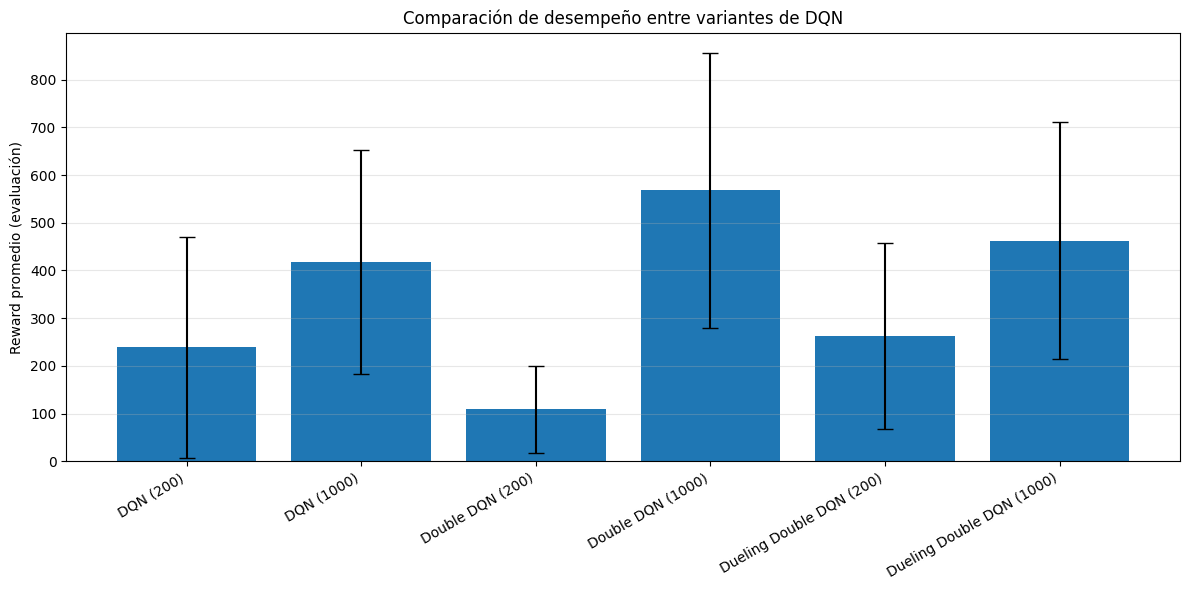

In [ ]:
import numpy as np

import matplotlib.pyplot as plt



# -------------------------------------------------------

# Rutas a los CSV de evaluación (ajusta si cambia el path)

# -------------------------------------------------------

experimentos = {

    "DQN (200)": "../resultados/eval_200_dqn/metricas.csv",

    "DQN (1000)": "../resultados/eval_1000_dqn/metricas.csv",

    "Double DQN (200)": "../resultados/eval_200_double_dqn/metricas.csv",

    "Double DQN (1000)": "../resultados/eval_1000_double_dqn/metricas.csv",

    "Dueling Double DQN (200)": "../resultados/eval_200_dueling_double_dqn/metricas.csv",

    "Dueling Double DQN (1000)": "../resultados/eval_1000_dueling_double_dqn/metricas.csv",

}





def _leer_csv_metricas(ruta_csv: str):

    """Lee metricas.csv sin depender de pandas.



    Espera columnas:

      - reward_total

      - frames

    """

    import csv



    rewards = []

    frames = []



    with open(ruta_csv, newline="", encoding="utf-8") as f:

        reader = csv.DictReader(f)

        for row in reader:

            rewards.append(float(row["reward_total"]))

            if "frames" in row and row["frames"] != "":

                frames.append(float(row["frames"]))



    return np.array(rewards, dtype=float), np.array(frames, dtype=float)





# -------------------------------------------------------

# Cálculo de métricas desde CSV

# -------------------------------------------------------

resumen = []

modelos = []

reward_promedio = []

std_reward = []



for nombre, ruta in experimentos.items():

    rewards, frames = _leer_csv_metricas(ruta)



    modelos.append(nombre)

    reward_promedio.append(float(rewards.mean()))



    # Desviación estándar poblacional (ddof=0) para consistencia

    std_reward.append(float(rewards.std(ddof=0)))



    resumen.append(

        {

            "Modelo": nombre,

            "N": int(len(rewards)),

            "Reward promedio": float(rewards.mean()),

            "Reward máx": float(rewards.max()),

            "Reward mín": float(rewards.min()),

            "Std reward (ddof=0)": float(rewards.std(ddof=0)),

            "Frames promedio": float(frames.mean()) if len(frames) else None,

        }

    )





# Intentar mostrar tabla con pandas si está disponible

try:

    import pandas as pd



    df_resumen = pd.DataFrame(resumen)

    display(df_resumen)

except Exception:

    for r in resumen:

        print(r)





# -------------------------------------------------------

# Gráfico comparativo

# -------------------------------------------------------

x = np.arange(len(modelos))



plt.figure(figsize=(12, 6))

plt.bar(x, reward_promedio, yerr=std_reward, capsize=6)



plt.xticks(x, modelos, rotation=30, ha="right")

plt.ylabel("Reward promedio (evaluación)")

plt.title("Comparación de desempeño entre variantes de DQN")

plt.grid(axis="y", alpha=0.3)



plt.tight_layout()

plt.show()


### gráfico comparativo



El gráfico de barras muestra el **reward promedio obtenido durante la evaluación** para cada variante de DQN, junto con su **desviación estándar**, lo que permite analizar tanto el desempeño como la estabilidad de cada modelo.



En primer lugar, se observa un efecto claro del **número de episodios de entrenamiento**. En los tres modelos evaluados (DQN, Double DQN y Dueling Double DQN), el entrenamiento hasta **1000 episodios** produce un incremento significativo del reward promedio en comparación con los modelos entrenados solo hasta **200 episodios**. Esto indica que el agente continúa mejorando su política con más interacción con el entorno.



Al comparar arquitecturas, el **DQN clásico** muestra un aumento importante del reward promedio al pasar de 200 a 1000 episodios, pero mantiene **variabilidad** entre episodios de evaluación. Esto sugiere que, aunque el agente aprende, su comportamiento puede no ser uniforme en todas las ejecuciones.



El **Double DQN** presenta un comportamiento distinto. A 200 episodios, su desempeño es bajo, pero con **1000 episodios** alcanza el **mayor reward promedio** entre los modelos comparados en esta corrida. Sin embargo, la desviación estándar sigue siendo elevada, lo que indica que el desempeño no es completamente consistente entre ejecuciones.



La variante **Dueling Double DQN** muestra un balance interesante entre desempeño y estabilidad. Con 1000 episodios alcanza un reward promedio alto y, frente a Double DQN, reduce la variabilidad en estas evaluaciones (aunque sin superar su reward promedio).



En conjunto, el gráfico confirma empíricamente que:



- Incrementar el número de episodios de entrenamiento mejora el desempeño en todas las variantes.

- Double DQN puede mejorar el reward promedio respecto a DQN clásico.

- La arquitectura Dueling puede contribuir a una política más estable en combinación con Double DQN.



Estos resultados son coherentes con la teoría del aprendizaje por refuerzo y con los comportamientos observados visualmente durante la evaluación.



## Conclusiones



En este trabajo se implementaron y evaluaron distintas variantes del algoritmo **Deep Q-Network (DQN)** aplicadas al entorno **CarRacing-v3**, con el objetivo de analizar el impacto de la arquitectura y del número de episodios de entrenamiento en el desempeño del agente.



A partir de los experimentos realizados, se pueden extraer las siguientes conclusiones:



1. **El número de episodios de entrenamiento es un factor determinante**.

   En las tres variantes evaluadas (DQN, Double DQN y Dueling Double DQN), los modelos entrenados durante **1000 episodios** superan claramente a sus versiones entrenadas solo hasta **200 episodios**.



2. **DQN clásico logra aprender, pero presenta variabilidad entre episodios**.

   Aunque el modelo DQN mejora considerablemente con más entrenamiento, los resultados de evaluación muestran dispersión en el reward.



3. **Double DQN obtuvo el mayor reward promedio a 1000 episodios en esta corrida**.

   Esto es consistente con su objetivo de reducir sesgos por sobreestimación en DQN. Aun así, la variabilidad entre episodios se mantiene.



4. **Dueling Double DQN ofrece un buen compromiso desempeño/estabilidad**.

   En estas evaluaciones, su variabilidad es menor que la de Double DQN, aunque su reward promedio no lo supera.



5. **La evaluación sin exploración (ε = 0) permitió comparar las políticas de forma justa**.

   Al eliminar la exploración durante la evaluación, los resultados reflejan directamente la calidad de la política aprendida.



En conjunto, los resultados experimentales confirman la evidencia empírica esperada:



- entrenamientos más prolongados tienden a mejorar el desempeño,

- Double DQN puede superar a DQN clásico,

- la arquitectura Dueling puede ayudar a estabilizar el comportamiento cuando se combina con Double DQN.



## Trabajo futuro



Mejoras posibles para extender el proyecto:



- **Prioritized Experience Replay (PER)** para muestrear transiciones más informativas con mayor probabilidad.

- **n-step returns** (multi-step) para propagar recompensas a más largo plazo y acelerar aprendizaje.

- Mejorar exploración: ajustar el decaimiento de ε (más gradual) o probar **Noisy Networks**.

- Estabilización del entrenamiento: **Huber loss**, **gradient clipping** y/o actualización suave del target (Polyak).

- Evaluación más robusta: más episodios de prueba, varias semillas y promedios/intervalos de confianza.

- Probar algoritmos para **acciones continuas** (CarRacing es continuo): enfoques **Actor-Critic** como PPO/SAC/DDPG y comparar contra la discretización usada para DQN.



## Bibliografía



### Referencias (base teórica)



- Mnih, V., Kavukcuoglu, K., Silver, D., et al. (2015). Human-level control through deep reinforcement learning. *Nature, 518*, 529–533. https://doi.org/10.1038/nature14236

- Mnih, V., Kavukcuoglu, K., Silver, D., Graves, A., Antonoglou, I., Wierstra, D., & Riedmiller, M. (2013). *Playing Atari with Deep Reinforcement Learning* (arXiv:1312.5602). https://arxiv.org/abs/1312.5602

- van Hasselt, H., Guez, A., & Silver, D. (2016). Deep reinforcement learning with double Q-learning. *AAAI-16*. https://doi.org/10.1609/aaai.v30i1.10295

- Wang, Z., Schaul, T., Hessel, M., van Hasselt, H., Lanctot, M., & de Freitas, N. (2016). Dueling network architectures for deep reinforcement learning. *ICML 2016 (PMLR)*. https://proceedings.mlr.press/v48/wangf16.html

- Schaul, T., Quan, J., Antonoglou, I., & Silver, D. (2016). Prioritized experience replay. *ICLR 2016*. https://arxiv.org/abs/1511.05952

- Schulman, J., Wolski, F., Dhariwal, P., Radford, A., & Klimov, O. (2017). Proximal policy optimization algorithms (arXiv:1707.06347). https://arxiv.org/abs/1707.06347

- Farama Foundation. (n.d.). *Car Racing (CarRacing-v3)*. Gymnasium Documentation. https://gymnasium.farama.org/environments/box2d/car_racing/



### Software y librerías



- Bradski, G. (2000). The OpenCV Library. *Dr. Dobb’s Journal of Software Tools*.

- Harris, C. R., et al. (2020). Array programming with NumPy. *Nature, 585*(7825), 357–362. https://doi.org/10.1038/s41586-020-2649-2

- Hunter, J. D. (2007). Matplotlib: A 2D graphics environment. *Computing in Science & Engineering, 9*(3), 90–95. https://doi.org/10.1109/MCSE.2007.55

- McKinney, W. (2010). Data structures for statistical computing in Python. *SciPy 2010*. https://conference.scipy.org/proceedings/scipy2010/mckinney.html

- Paszke, A., et al. (2019). PyTorch: An imperative style, high-performance deep learning library. *NeurIPS 2019*. https://arxiv.org/abs/1912.01703



## Participación



- **Koc Góngora, Luis Enrique**: redacción de informe; revisión de código; revisión bibliográfica.

- **Mancilla Antaya, Alex Felipe**: codificación y entrenamiento; revisión bibliográfica; revisión de informe y presentación.

- **Meléndez García, Herbert Antonio**: redacción de informe; revisión de código; revisión bibliográfica.

- **Paitán Cano, Dennis Jack**: revisión de código; revisión de texto; revisión bibliográfica; elaboración de presentación.



## Transparencia (uso de herramientas)



El desarrollo del proyecto (diseño, implementación, ejecución de experimentos y análisis) fue realizado por el equipo del **Grupo 4**. Se utilizaron herramientas de apoyo (incluyendo asistentes de IA) para mejorar redacción/documentación y revisar consistencia del reporte, pero el diseño, implementación, ejecución de experimentos y análisis de resultados corresponden al equipo.
